<a href="https://colab.research.google.com/github/jinsusong/study-paper-review/blob/main/04_Adversarial_Examples_for_Evaluating_Reading_Comprehension_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adversarial Examples for Evaluating Reading Comprehension Systems

## Introduction

###Purpose

1. 많은 Reading Comprehension System들의 성능이 빠르게 향상되고 있지만, 이 모델들이 실제로 언어를 이해하고 있는 것인지는 확실치 않음 이를 확인하기 위해 문단에 Adversarial Sentences가 추가되었을 때에도 질문에 대한 답변을 잘 하는지를 확인하기 위한 데이터셋을 생성 



###Baseline

1. Task 
    - Standord Question Answering Dataset (SQuAD)
        - 위키피디아 글에 대해 사람이 생성한 Question으로 구성된 데이터 셋
        - 데이터 셋 하나마다 Paragraph + Question + Answer로 구성

2. Models
    - 정답에 대한 확률 분포를 예측하는 모델들을 사용
        - BiDAF(Bidirectional Attention Flow)
        - Match-LSTM
    - Validation에는 추가적으로 12개의 모델을 사용

3. Evaluation
    - F1 Score를 활용
    - 실제 정답과 예측된 정답 사이의 F1 score의 평균을 사용
    - Adversarial Evaluation에서는 adversaty가 추가된 p에 대해 예측된 정답과 실제 정답 사이의 F1 Score를 구해 adversarial accuracy를 구함 

4. 


## Generation

### AddSent 

In [ ]:
- 4가지 단계를 거쳐 질문과 비슷한 문장을 생성하여 문단의 제일 끝에 붙임 

1. 명사와 형용사를 WordNet에서 얻은 반의어로 바꾸고, Named Entities를 GloVe 단어벡터공간에서 가장 유사한 단어로 교체 
2. 원래 정답과 같은 "종류"의 정답 생성
3. 1,2번 과정을 거쳐 얻은 가짜 질문과 가짜 정답을 평서문으로 전환 
4. CrowdSourcing을 통한 문장의 오류 수정 


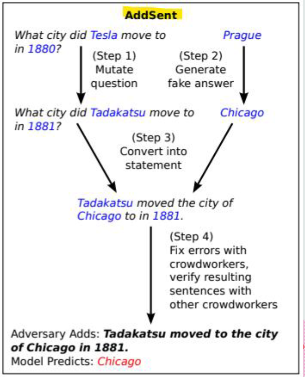

### AddOneSent 

- AddSent의 경우에는 model이 최악의 정답을 내놓은 경우를 선택한다는 점에서 어느정도 model dependent
- Model independent한 case에 대한 가능성을 위해, AddOneSent 도입
- AddOneSent는 AddSent에서 마지막 최악의 정답을 내놓는 경우를 선택하는 것이 아닌, 랜덤으로 하나를 선택하여 사용


###AddAny


- 문법에 상관없이 d개의 단어로 이루어진 sequence를 생성 

1. Random Sampled common words와 Words in Question으로 구성된 단어들의 seed set을 구성 
2. Iteration을 돌며 d의 크기 만큼 greedy하게 단어를 바꿈
3. 각 iteration에 대해 모델의 output distribution에 대한 F1-score를 최소화 하는 경우를 선택 


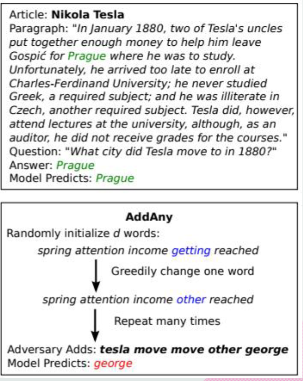

###AddCommon

- AddAny의 경우는 생성된 문장에 질문들의 단어가 포함되어 있다. 
- 이를 피하기 위해 단어의 seed set을 생성시에 random sampled common words만 포함하여 문장을 생성


## Experiment 

1. Match LSRM Single Model
2. Match LSTM Ens. Model
3. BiDAF Single Model
4. BIDAF Ens. Model

- 네 가지 모델을 가지고 AddSent , AddOneSent, AddAny, AddCommon의 적대적 예시구문을 추가해서 테스트한 결과 
- 기존 모델들이 adversary에 대처를 잘하는 모습을 보이지 않음.
- AddAny가 AddSent보다 더 효과적으로 성능을 떨어뜨림.
- 


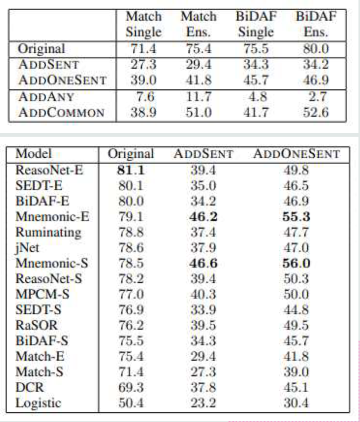

- 모델에 적대적 구문이 추가된 테스트 셋을 가지고 테스트를 진행했을때에도 잘 예측을 한 경우가 존재 

    1. 질문이 원본 문장과 정확한 n-gram 일치가 있는 경우
    2. 짧은 질문인 경우
    

- AddSent의 Model Failure의 경우에, 96.6%는 적대적 예시 구문(adversary)에 있는 문장을 정답으로 예측함

- 


##Conclusion

- 표준 평가 지표에 따른 모델의 성능은 성공적이었음에도 불구하고, 기존의 reading Comprehension System은 adversarial evaluation에서 성능이 떨어짐 
- 본 논문에서 실시한 adversarial evaluation은 기존 모델이 지나치게 안정적이라는 것을 보여줌
- 이러한 adversarial evaluation을 최적화 하려면 새로운 전략이 필요함
- 언어를 진정으로 이해하는 시스템 구축을 위해 모든 SQuAD 시스템에서 AddSent를 실행하는 스크립트와 AddAny코드를 릴리즈 하였음.
- 해당 작업이 언어를 더 깊이 이해하는 보다 정교한 모델의 개발에 동기를 부여하기를 바람


참고 : https://www.youtube.com/watch?v=u-R_tUE6yys